# Game Theory
##### Gabriel Lima Barros - 2020006531
##### Gabriel Teixeira Carvalho - 2020006558
##### Thiago Pádua de Carvalho - 2020007066

### Introdução
Nesta atividade será desenvolvido uma simulação do dilema do prisioneiro. O dilema do prisioneiro é um problema da teoria dos jogos que mostra que dois indivíduos podem não cooperar mesmo que isso seja pior para ambos. O problema é o seguinte: dois suspeitos de um crime são presos e interrogados separadamente. Se ambos confessarem, cada um cumprirá 5 anos de prisão. Se um confessar e o outro não, o que confessou será libertado e o outro cumprirá 10 anos de prisão. Se nenhum confessar, ambos cumprirão 2 anos de prisão. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
def initial_system_config(N):
    """
    Define a configuração inicial do sistema aleatoriamente 
    S é um array unidimensional que recebe valores aleatórios 0 ou 1 em cada uma de suas posições
    0 representa uma cooperação e 1 representa uma deserção
    """
    S = np.random.randint(0, 2, size=N)
    return S

In [3]:
def vizinhos(N):
    """
    Define a tabela de vizinhos
    """
    L=int(np.sqrt(N))
    viz = np.zeros((N,4),dtype=np.int16)
    for k in range(N):
        viz[k,0]=k+1
        if (k+1) % L == 0:
            viz[k,0] = k+1-L
        viz[k,1] = k+L
        if k > (N-L-1):
            viz[k,1] = k+L-N
        viz[k,2] = k-1
        if (k % L == 0):
            viz[k,2] = k+L-1
        viz[k,3] = k-L
        if k < L:
            viz[k,3] = k+N-L
    return viz

In [4]:
def payoff(S, viz, N, P):
    """
    Calcula o payoff de cada jogador
    """
    M = np.zeros(N)
    for k in range(N):
        for j in range(4):
            M[k] += P[S[k]][S[viz[k,j]]]
    
    return M

In [5]:
def change_strategy(S, M, i, viz, K, P):
    """
    Altera a estratégia de um jogador aleatoriamente e atualiza a tabela de payoff
    """
    
    i_viz = np.random.randint(0, 4)
    old_strategy = S[i]
    new_strategy = S[i]
    viz_strategy = S[viz[i, i_viz]]
    change_strategy_odd = 1 / (1 + np.exp(- (M[viz[i,i_viz]] - M[i]) / K))
    if np.random.rand() < change_strategy_odd:
        S[i] = viz_strategy
        new_strategy = viz_strategy
        M[i] = 0
        for j in range(4):
            vizinho = viz[i,j]
            M[i] += P[S[i]][S[vizinho]]
            M[vizinho] = 0
            for k in range(4):
                M[vizinho] += P[S[vizinho]][S[viz[vizinho,k]]]
    return S, old_strategy, new_strategy

In [6]:
def plot_results(C, D):
  plt.plot(C, label='Cooperadores')
  plt.plot(D, label='Desertores')
  plt.legend()
  plt.show()

In [7]:
def simulate(L, b, K, iter):
  N = L**2
  S = initial_system_config(N)
  viz = vizinhos(N)
  P = [[1, 0], [b, 0]]
  M = payoff(S, viz, N, P)
  C = []
  D = []
  num_cooperadores = np.sum(S==0)
  C.append(num_cooperadores)
  D.append(N - num_cooperadores)
  for _ in range(iter):
    for i in range(N):
      S, old_strategy, new_strategy = change_strategy(S, M, i, viz, K, P)
      if old_strategy != new_strategy and old_strategy == 0:
        num_cooperadores -= 1
      elif old_strategy != new_strategy and old_strategy == 1:
        num_cooperadores += 1
      C.append(num_cooperadores)
      D.append(N - num_cooperadores)
  return [C, D]

Valor de K escolhido = 0.4

In [8]:
np.random.seed(42)

In [9]:
results = []

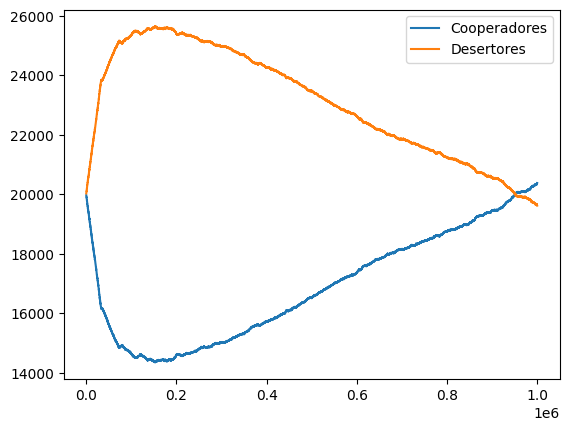

In [10]:
C, D = simulate(200, 1, 0.4, 25)
results.append([C, D])
plot_results(C, D)

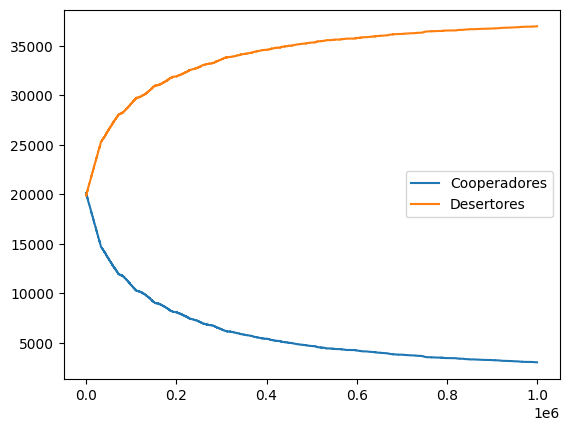

In [11]:
C, D = simulate(200, 1.2, 0.4, 25)
results.append([C, D])
plot_results(C, D)

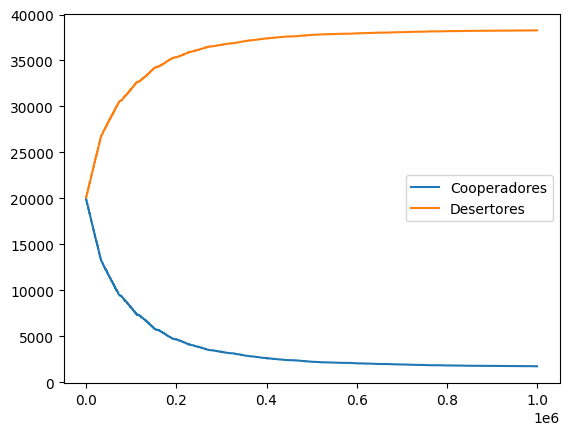

In [12]:
C, D = simulate(200, 1.4, 0.4, 25)
results.append([C, D])
plot_results(C, D)

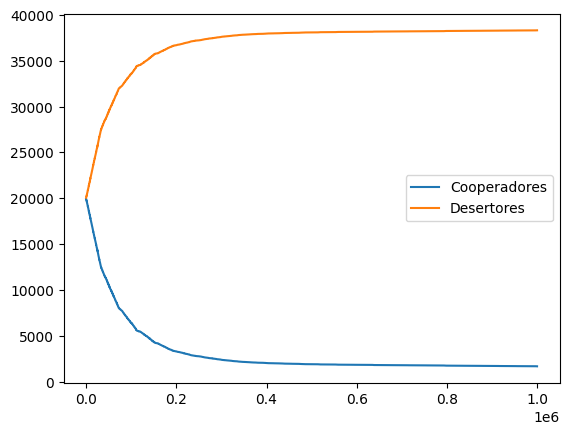

In [13]:
C, D = simulate(200, 1.6, 0.4, 25)
results.append([C, D])
plot_results(C, D)

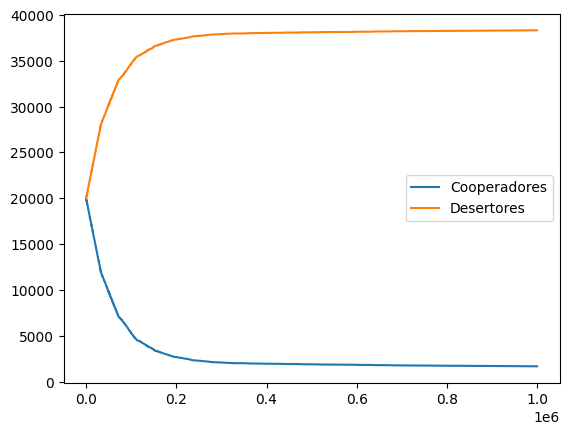

In [14]:
C, D = simulate(200, 1.8, 0.4, 25)
results.append([C, D])
plot_results(C, D)

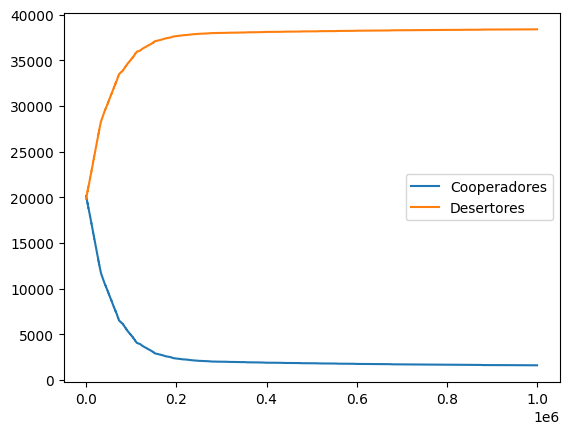

In [15]:
C, D = simulate(200, 2, 0.4, 25)
results.append([C, D])
plot_results(C, D)

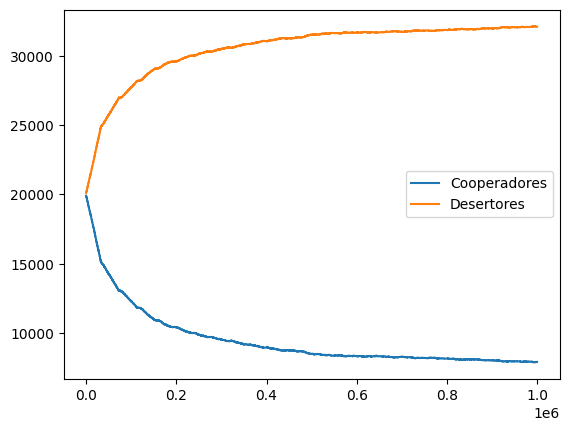

In [16]:
C, D = simulate(200, 1.1, 0.4, 25)
results.append([C, D])
plot_results(C, D)

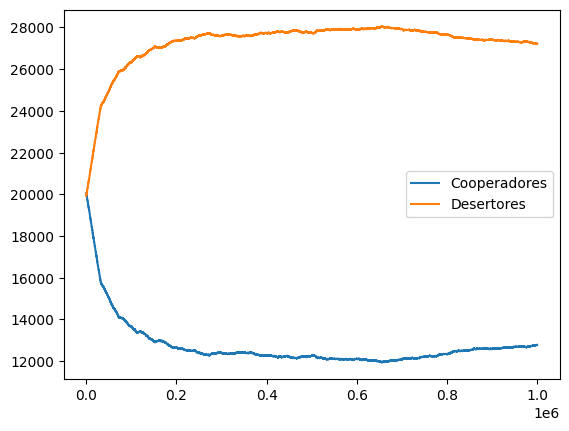

In [17]:
C, D = simulate(200, 1.05, 0.4, 25)
results.append([C, D])
plot_results(C, D)

/home/gabriel/.local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/gabriel/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


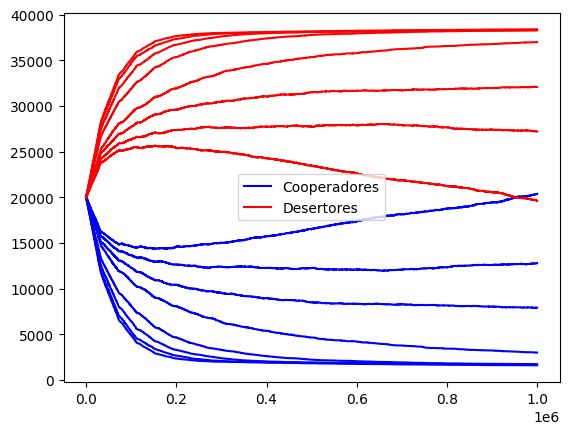

In [18]:
for i in range(len(results)):
  C, D = results[i]
  plt.plot(C, color = 'b', label='Cooperadores')
  plt.plot(D, color = 'r', label='Desertores')
  if i == 0:
    plt.legend()

O valor de b influencia diretamente na escolha de estratégia dos jogadores. Para todos os valores b < b1, todos os jogadores eventualmente decidem cooperar, pois o ganho é baixo. Para b > b2, todos os jogadores decidem desertar, pois o ganho de trair o colega vale mais a pena. Para b1 < b < b2, o número de jogadores que cooperam ou desertam chega em um ponto de equilíbrio maior que 0 e menor que N, dependendo da estratégia inicial, do valor de b e do valor de k. 

Nas simulações acima, com K = 0.4, para b > 1.2 todos os jogadores desertam, enquanto para b = 1, eventualmente todos os jogadores cooperam. Para b = 1.05, o número de jogadores que desertam equilibra em cerca de 26000 / 40000 = 0.65, enquanto para b = 1.1, o número de jogadores que desertam equilibra em cerca de 34000 / 40000 = 0.85. Portanto, o valor de b1 está entre 1 e 1.2. O número de jogadores que desertam para b entre 1 e 1.2, no equilíbrio, é sempre maior que os que cooperam, pois para b = 1, o ganho de desertar é igual ao de cooperar, tendendo à densidade de 1 quando b tende a 2.

O valor de k, relacionado à irracionalidade das decisões, influencia na velocidade de convergência para o equilíbrio. Quanto menor o valor de k, mais rápido os jogadores convergem para o equilíbrio.